# Monte Carlo simulation for differential entropy approximation

In [1]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

import numpy as np
import plotly.graph_objects as go

In [2]:
def ha(x: np.ndarray) -> np.ndarray:
    h = (1 + np.log(2 * np.pi)) / 2
    v = x.var()
    return h - ja(x) + np.log(v) / 2

def ja(x: np.ndarray) -> np.ndarray:
    k1 = 36 / (8 * np.sqrt(3) - 9)
    k2 = 1 / (2 - 6 / np.pi)

    m = x.mean()
    v = x.var()
    n = (x - m) / np.sqrt(v)
    e1 = (n * np.exp(-(n**2) / 2)).mean() ** 2
    e2 = (np.abs(n).mean() - np.sqrt(2 / np.pi)) ** 2
    return  k1 * e1 + k2 * e2

In [3]:
class Distribution(ABC):
    @abstractmethod
    def sample(self, n: int) -> np.ndarray:
        ...

    @abstractmethod
    def log_p(self, x: np.ndarray) -> np.ndarray:
        ...

In [4]:
@dataclass
class GaussianMixture(Distribution):
    g: np.random.Generator
    mu: float

    def sample(self, n: int) -> np.ndarray:
        a = self.g.normal(size=n)
        b = self.g.normal(size=n) / 2 + 1
        p = self. mu / (2 - self.mu)
        d = self.g.binomial(1, p, n)
        return a * d + (1- d) * b

    def log_p(self, x: np.ndarray) -> np.ndarray:
        a = np.exp(normal_logp(x)) * self.mu
        b = (1 - self.mu) * 2 * np.exp(normal_logp(x, loc=1, var=1/4))
        return np.log(a + b) - np.log(2 - mu)

In [5]:
def normal_logp(x: np.ndarray, loc: float = 0, var: float = 1) -> np.ndarray:
    return -((x - loc) ** 2) / (2 * var) - np.log(2 * np.pi * var) / 2


In [6]:
g = np.random.default_rng()
mus = np.linspace(0, 1)
hs = []
for mu in mus:
    d = GaussianMixture(g, mu)
    s = d.sample(100000)
    e = - d.log_p(s).mean()
    n = (1 + np.log(2 * np.pi)) / 2 + np.log(s.var()) / 2
    h = ha(s)
    j = ja(s)
    hs.append((e, h, n - e, j))
hs = np.array(hs)

In [7]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=mus,
            y=hs[:,0]
        ),
        go.Scatter(
            x=mus,
            y=hs[:,1]
        ),
    ]
)

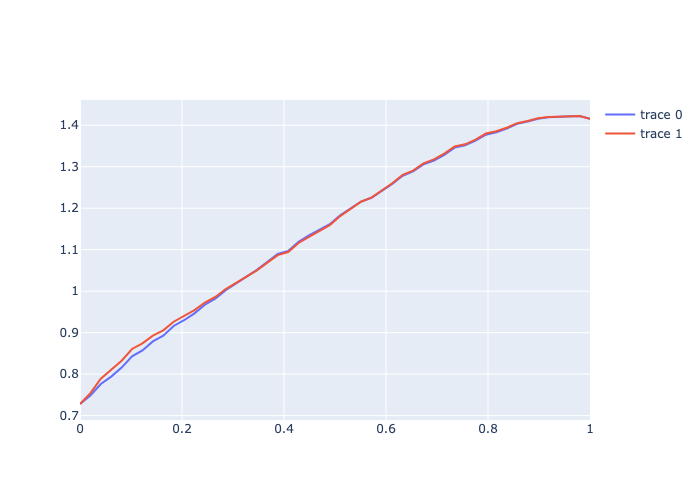

In [8]:
fig.show("png")

In [9]:
fig = go.Figure(
    data=[
        go.Scatter(
            x=mus,
            y=hs[:,2]
        ),
        go.Scatter(
            x=mus,
            y=hs[:,3]
        ),
    ]
)

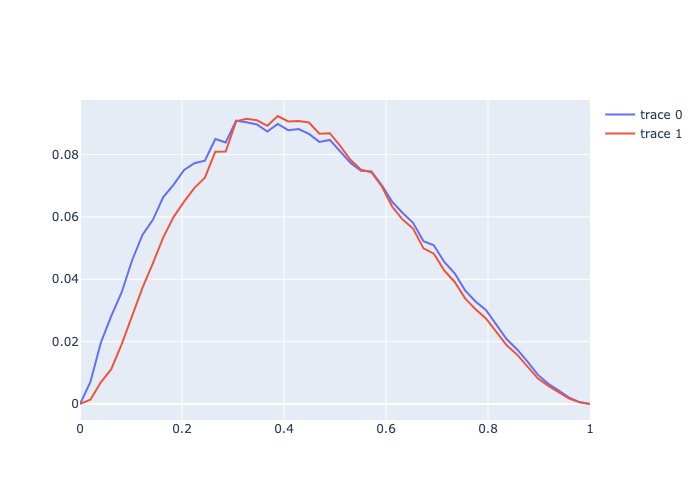

In [10]:
fig.show("png")